<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método implícito de Crank-Nicolson**

Se considera la siguiente ecuación diferncial parcial:
$$
\begin{aligned}
&\frac{\partial u}{\partial t} \;=\; \frac{\partial^{2}u}{\partial x^{2}},
\qquad 0 \le x \le 1,\; t>0, \\[6pt]
&u(0,t) = u(1,t) = 0,
\qquad t>0, \\[6pt]
&u(x,0) = f(x) = 1 - 4\left(x - \tfrac{1}{2}\right)^{2},
\qquad 0 \le x \le 1.
\end{aligned}
$$


Utlizando diferencias centradas obtenemos lo siguiente:
$$
-\frac{U_{i,j+1}-U_{ij}}{k}
=
\frac{1}{2}
\left[
\frac{U_{i+1,j+1}-2U_{i,j+1}+U_{i-1,j+1}}{h^2}
+
\frac{U_{i+1,j}-2U_{ij}+U_{i-1,j}}{h^2}
\right]
$$

Con una valo de r:
$$
r=\frac{\alpha^{2}\,k}{h^{2}}
$$

Se parte de la siguiente ecuación diferencial parcial, lo que se hace es partir de las fórmulas de diferencias finitas, se sustituye la derivada temporal y se sustituye la segundada derivada espacial.

Se hace la simplificación y nos lleva a una ecuación en diferencias finitas:

$$
\boxed{
-r\,U_{i-1,j+1} \;+\; (2+2r)\,U_{i,j+1} \;-\; r\,U_{i+1,j+1}
\;=\;
r\,U_{i-1,j} \;+\; (2+2r)\,U_{i,j} \;+\; r\,U_{i+1,j}
}
$$

$$
\text{para } j = 0,1,2,\ldots
$$

In [1]:
import sympy as sp # para matemática simbólica: Manipular expresiones algebraicas, resolver ecuaciones
import numpy as np # Sirve para cálculo numérico
import matplotlib.pyplot as plt #para crear gráficas 2D
from mpl_toolkits.mplot3d import Axes3D # necesario para 3D
from tabulate import tabulate # para hacer una tabla (para crear tablas bonitas y ordenadas en consola)
from matplotlib import cm  # Sirve para usar colormaps (esquemas de colores)

In [2]:
def f(x):
    return 1-4*(x-0.5)**2 # Se define la función

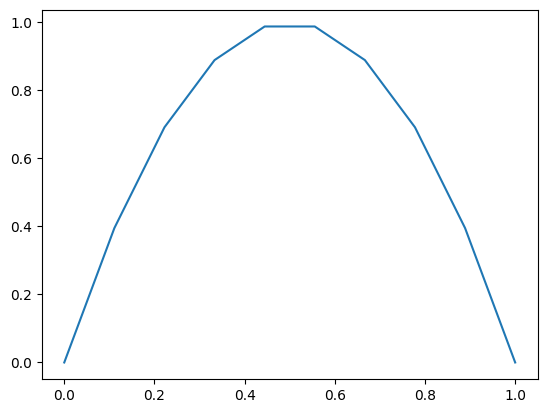

In [3]:
x=np.linspace(0,1,10) #para verificación de la función sea correcta
plt.plot(x,f(x))

In [4]:
# Necesario para introducir la matriz tridiagonal, para ello se difine una función para escribir dicha matriz, que requiere tres argumentos:
# n:tamaño, a: diagonal principal, b: ter ind
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])
    # Cundo los subíndices sean iguales va ir a y cuando sean distintos por una unidad se asignará b

In [5]:
r=1 # se toma r en la matriz que previamente escribimos,r se difinío en la descripción del problema, nostros elegimos la malla para que r valga 1

In [6]:
A=tridiagonal(9, 2+2*r, -r) # La matriz tridiagonal esta de tamaño 9, en la diagonal principal coloca 2+2r, a su lado -r


In [7]:
A # Imprime esa matriz tridiagonal

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [8]:
B = tridiagonal(9, 2 - 2*r, r) # De manera similar se plantea la otra matriz

In [9]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
b=sp.Matrix([f(0.1*(i+1)) for i in range(9)]) # Se mete o introduce el vector b, construye una matriz columna con los valores de la función f(x) evaluados en ciertos puntos.

In [ ]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [11]:
def crank_nicolson(A, B, b, j):
    b_1 = B*b            #mismo paso inicila de tu función, la matriz se toma como un producto.
    S = []               #aquí gurdaremos cada solución

    for i in range(j):
        sol = A.LUsolve(b_1)    # u^{n+1}
        S.append(sol.T)         # guardar fila (como vector renglón)
        b_1 = B*sol             # preparar siguiente paso

    # Convertir lista de vectores sympy a una matriz sympy
    return sp.Matrix(S)

**Ejercicio 1.** Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate.

In [12]:
j = 50

In [13]:
U=crank_nicolson(A, B, b, j) # Cálculo de la matriz U

In [14]:
data = [list(U.row(i)) for i in range(5)] # Convierte 5 filas de una matriz U en una lista de listas, las imprime como una tabla organizada, fácil de visualizar

print(tabulate(data, tablefmt="grid"))

# Ordenar en una tabla lo que esta esta matriz U

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

Al comparar la imagen de la tabla a lo que salió en el programa aparentemente no se parece, sin embargo, se considera t=0, es la parte inicial, es la parábola, esa no se calculó debido a que sólo se consideraron los nodos interiores.

In [15]:

U_np = np.array(U.tolist(), dtype=float) # Se convierte en un arreglo para poder graficar

In [16]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.5, j) #Debe coincidir con el tamaño de j ppor k (tiempo)
X, Y = np.meshgrid(x, y)

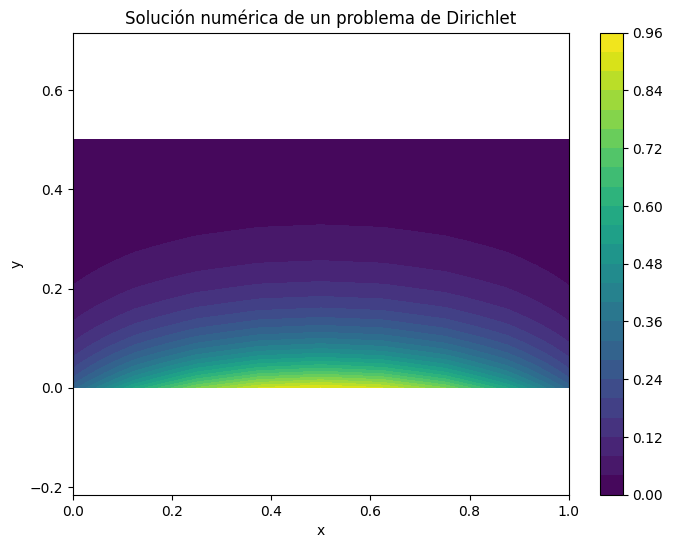

In [17]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

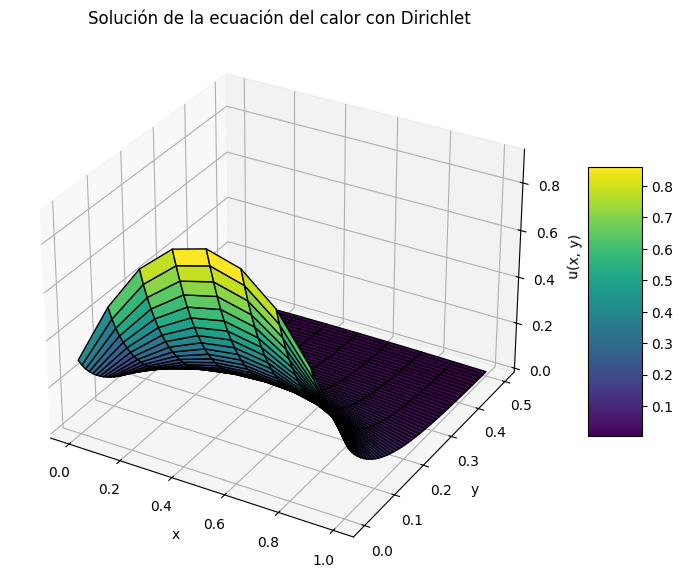

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Ejercicio 2:** La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.

In [19]:
# Matriz tridiagonal de Sympy

def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])
    # Cuando i=j -> a; si difieren en 1 -> b; en otro caso 0

In [20]:
# Definición de la condición inicial u(x,0)
def f(x):
    return 1 - 4*(x - 0.5)**2

# Parámetros de malla
h = 0.1          # Δx
k = 0.01         # Δt
r = k/h**2       # se fijó r=1; con h=0.1 y k=0.01 r=1

print("r =", r)

r = 0.9999999999999998


In [21]:
# Matrices A y B de Crank–Nicolson
A = tridiagonal(9, 2+2*r, -r)
B = tridiagonal(9, 2-2*r,  r)

# Vector con condición inicial en los 9 nodos interiores x=0.1,...,0.9
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])


In [22]:
## Método de Crank–Nicolson ##

def crank_nicolson(A, B, b, j):
    b_1 = B*b          # primer lado derecho
    S = []             # aquí guardamos cada solución u^{n+1}

    for i in range(j):
        sol = A.LUsolve(b_1)   # resuelve A u^{n+1} = b_1
        S.append(sol.T)        # guardamos como renglón
        b_1 = B*sol            # preparamos siguiente paso: b_1 = B u^{n+1}

    # Convertimos lista de renglones sympy a matriz sympy
    return sp.Matrix(S)

# Número de pasos en tiempo (hasta t = j * k)
j = 50            # esto llega hasta t = 0.50

U = crank_nicolson(A, B, b, j)   # matriz j x 9 (solo nodos interiores)


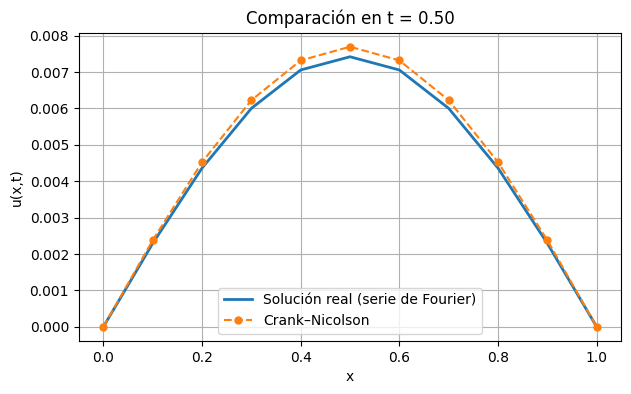

Norma 2 del error en t = 0.50: 6.1697e-04
Norma infinito del error en t = 0.50: 2.7592e-04


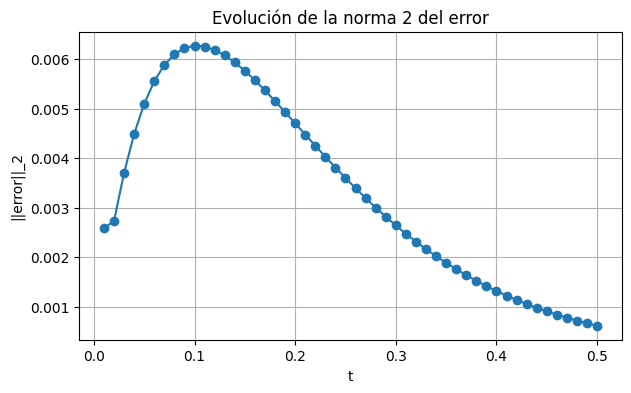

In [24]:



### EJERCICIO 2: Solución real y comparación con Crank–Nicolson###

# Ecuación: u_t = u_xx, 0<x<1
# u(0,t)=u(1,t)=0
# u(x,0)=1-4(x-1/2)^2 = -4x^2 + 4x
#
# Solución exacta (serie de Fourier):
#   u(x,t) = Σ_{n impar} b_n sin(n π x) e^{-n^2 π^2 t},
#   b_n = 32 / (n^3 π^3), n impar; b_n=0 para n par.

def u_exact(x, t, M=100):
#Solución exacta aproximada con M términos de la serie.#
  #x puede ser escalar o arreglo de NumPy.#

    x = np.array(x, dtype=float)
    s = np.zeros_like(x)
    for m in range(1, M+1):
        n = 2*m - 1                      # solo n impares
        coef = 32.0 / (np.pi**3 * n**3)
        s += coef * np.sin(n*np.pi*x) * np.exp(-(n**2)*(np.pi**2)*t)
    return s

# Elegimos un tiempo para comparar, por ejemplo t = 0.10
# (El renglón 0 de U es t = k, el renglón i es t = (i+1)k)

t_comp = 0.50
idx = int(t_comp/k) - 1   # índice correspondiente a t=0.10

# nodos de espacio incluyendo las fronteras x=0 y x=1
x_nodes = np.linspace(0, 1, 11)   # 0,0.1,...,1.0

# solución numérica en esos nodos (rellenando las fronteras con 0)
u_num_int = np.array(U.row(idx), dtype=float).flatten()  # 9 nodos interiores
u_num = np.zeros_like(x_nodes)
u_num[1:-1] = u_num_int   # fronteras x=0 y x=1 son 0

# solución real en los mismos nodos
u_real = u_exact(x_nodes, t_comp, M=200)


# Gráfica de solución numérica vs solución real en el mismo panel#

plt.figure(figsize=(7,4))
plt.plot(x_nodes, u_real, label="Solución real (serie de Fourier)", linewidth=2)
plt.plot(x_nodes, u_num, "o--", label="Crank–Nicolson", markersize=5)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title(f"Comparación en t = {t_comp:.2f}")
plt.grid(True)
plt.legend()
plt.show()


## Cálculo del error mediante una norma##
# Usamos:
#   - Norma 2 discreta (Euclídea) ||e||_2
#   - Norma infinito ||e||_∞

e = u_num - u_real
norma_2 = np.linalg.norm(e, 2)      # norma Euclídea
norma_inf = np.linalg.norm(e, np.inf)

print(f"Norma 2 del error en t = {t_comp:.2f}: {norma_2:.4e}")
print(f"Norma infinito del error en t = {t_comp:.2f}: {norma_inf:.4e}")


## error en todos los tiempos hasta t = 0.50##
errores_2 = []
tiempos = []

for nstep in range(j):
    t = (nstep+1)*k
    u_int = np.array(U.row(nstep), dtype=float).flatten()
    u_num = np.zeros_like(x_nodes)
    u_num[1:-1] = u_int
    u_real = u_exact(x_nodes, t, M=200)
    e = u_num - u_real
    errores_2.append(np.linalg.norm(e, 2))
    tiempos.append(t)

plt.figure(figsize=(7,4))
plt.plot(tiempos, errores_2, "o-")
plt.xlabel("t")
plt.ylabel("||error||_2")
plt.title("Evolución de la norma 2 del error")
plt.grid(True)
plt.show()